# Pymaceuticals Inc.
---

### Analysis of Drug Treatment Trials for Tumor Volume Reduction in Mice

Data Summary: The dataset consists of information on tumor volume and metastatic sites in various mice under different drug regimens, including mouse ID, timepoint, tumor volume (in mm3), metastatic sites, drug regimen, sex, age in months, and weight in grams of each mouse.

Key Insight: The drug Capomulin demonstrated its effectiveness in reducing overall tumor volume during the treatment period. One of the mice (ID 'g288') showed a reduction of 7.925 (mm3) in tumor volume, as depicted in Figure 6.

The correlation coefficient of 0.84 between mouse weight and average tumor volume indicates a positive relationship between these variables, implying that an increase in mouse weight was associated with an increase in average tumor volume. Additionally, the regression analysis indicated a positive slope of the regression line and a model fit of 70%, demonstrating the potential use of this analysis for predicting future outcomes.

Conclusion: Based on the current findings, I would recommend conducting further animal trials to validate the study's results and investigate other drug regimens that may be effective in reducing tumor volume and metastasis.

Edwin Edmondson
Senior Data Analyst
Pymaceuticals, Inc.

All figures created during analysis have been included in main file for use in presentations.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files and pathing variable for ease of access.
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path) #CSV file 1
study_results = pd.read_csv(study_results_path) # CSV file 2

# Combine the data into a single DataFrame
merged_mouse = pd.merge(study_results, mouse_metadata, on ="Mouse ID")

# Display the data table for preview
merged_mouse.groupby('Mouse ID')
merged_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mouse_count = merged_mouse['Mouse ID'].nunique(dropna=True)
print(f'Total number of unique mice in drug trials = {mouse_count}.')

Total number of unique mice in drug trials = 249.


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mouse_ids = merged_mouse.duplicated(subset=['Mouse ID', 'Timepoint'])
dupped_Timepoints = merged_mouse.loc[duplicated_mouse_ids, 'Mouse ID'].unique()                        
dupped_Timepoints

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_mouse.loc[(merged_mouse['Mouse ID'] == 'g989')]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = merged_mouse.drop_duplicates(subset= ['Mouse ID', 'Timepoint'])

# Verifying dupilicated data is dropped.
dropVerify = cleaned_mouse_data.loc[(cleaned_mouse_data['Mouse ID'] == 'g989')]
dropVerify

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
870,g989,25,56.045564,1,Propriva,Female,21,26
871,g989,30,59.082294,1,Propriva,Female,21,26
872,g989,35,62.570880,2,Propriva,Female,21,26


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = cleaned_mouse_data['Mouse ID'].nunique()
print(f'Total number of unique mice in drug trial after dedupping: {mouse_count2}.')

Total number of unique mice in drug trial after dedupping: 249.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = cleaned_mouse_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
drug_median = cleaned_mouse_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
drug_variance = cleaned_mouse_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
drug_std = cleaned_mouse_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
drug_sem = cleaned_mouse_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
drug_summary = pd.DataFrame({'Mean Tumor Volume': drug_mean,
                             'Median Tumor Volume': drug_median,
                              'Tumor Volume Variance': drug_variance,
                               'Tumor Volume STD': drug_std,
                                'Tumor Volume ST Error': drug_sem})

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD,Tumor Volume ST Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

# Utulitzed the agg function to return agg data for tumor size related to each drug, used groupby to group the values based on drug name
# drop used to remove columns that could not agg due to values being str. 
# solution found https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
drug_summaryAM = cleaned_mouse_data.drop(['Mouse ID', 
                                          'Sex'], 
                                          axis= 1).groupby('Drug Regimen').agg(['mean', 
                                                                                'median', 
                                                                                'var', 
                                                                                'std', 
                                                                                'sem'])['Tumor Volume (mm3)']

drug_summaryAM

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

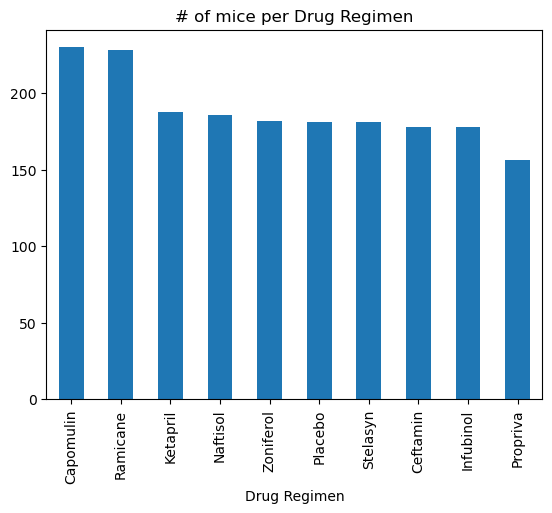

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Grouping and sorting the values to properly display.
mouse_per_drug_count = cleaned_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID'].sort_values(ascending=False)

# Plotting with titles
mouse_per_drug_count.plot(title='# of mice per Drug Regimen', x='Drug Regimen', y='# of Observed Mouse Timepoints', kind='bar')

# Saving chart for ease of access. 
plt.savefig('..\\Pymaceuticals\\fig1_pandas_bar_chart.png')

# Show plot.
plt.show()

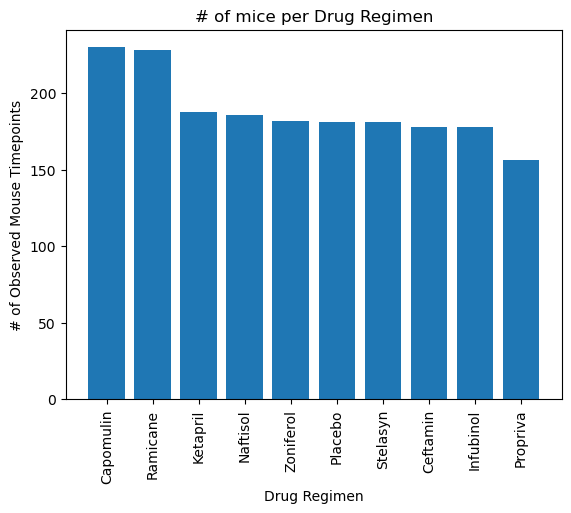

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Grouping and sorting the values to properly display.
mouse_per_drug_count = cleaned_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID'].sort_values(ascending=False)

# Plotting with titles
plt.bar(mouse_per_drug_count.index,mouse_per_drug_count.values)
plt.title('# of mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 90)

# Saving chart for ease of access. 
plt.savefig('..\\Pymaceuticals\\fig2_pyplot_bar_chart.png')

# Show plot.
plt.show()

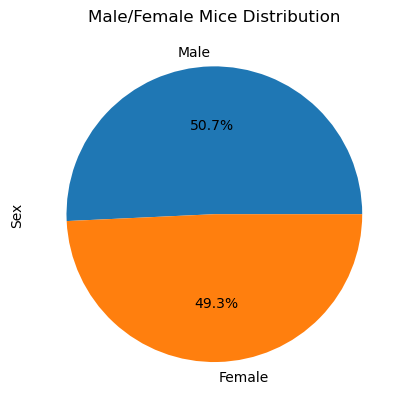

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_distro = cleaned_mouse_data.groupby(['Sex']).count()['Mouse ID'].sort_values(ascending=False)
mice_sex_distro.plot(title='Male/Female Mice Distribution',
                     ylabel='Sex', 
                     autopct='%1.1f%%', 
                     kind='pie')

# Saving chart for ease of access.
plt.savefig('..\\Pymaceuticals\\fig3_pandas_pie_chart.png')

# Show plot.
plt.show()

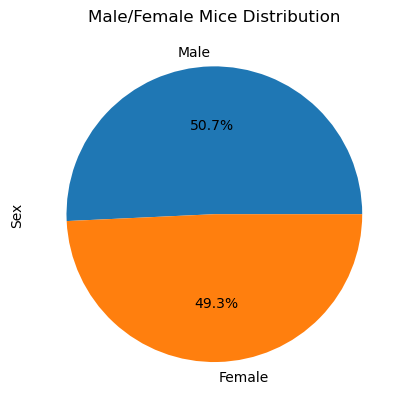

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Esatablishing data and grouping by sex to perform count of each sex based on mouse id and sorting to display male then female.
mice_sex_distro = cleaned_mouse_data.groupby(['Sex']).count()['Mouse ID'].sort_values(ascending=False)

# Creating variables for plotting. 
labels= mice_sex_distro.index.tolist()
sizes= mice_sex_distro.values.tolist()

# Plotting a pie chart
plt.pie(sizes, labels=labels, 
        autopct= '%1.1f%%')

# Chart labeling and beautification.
plt.title('Male/Female Mice Distribution')
plt.ylabel('Sex')

# Saving chart for ease of access.
plt.savefig('..\\Pymaceuticals\\fig4_pyplot_pie_chart.png')

# Show chart.
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Groupby function for necessary data and passing max to return highest timepoint value for each mouse id.
tp_high_point = cleaned_mouse_data.groupby(['Mouse ID'])['Timepoint'].max()

# Reset index for cleanup after grouping.
tp_high_point = tp_high_point.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tp_hp_mouse_data = tp_high_point.merge(cleaned_mouse_data, on=['Mouse ID','Timepoint'], how= 'left')

# Print results for verification
tp_hp_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = tp_hp_mouse_data.loc[tp_hp_mouse_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds.
    quartiles = tumor_vol.quantile([.25,.50,.75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q

    # Establishing bounds for outliers.
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)

    # Finding outliers
    outliers = tumor_vol.loc[(tumor_vol < lower_bound)| (tumor_vol > upper_bound)]
    
    # Conditional print statement to improve readabiltiy.
    if outliers.empty:
        print(f'For {drug}, there are no outliers.')
    else:
        print(f'{drug}\'s outliers are {outliers}')

For Capomulin, there are no outliers.
For Ramicane, there are no outliers.
Infubinol's outliers are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, there are no outliers.


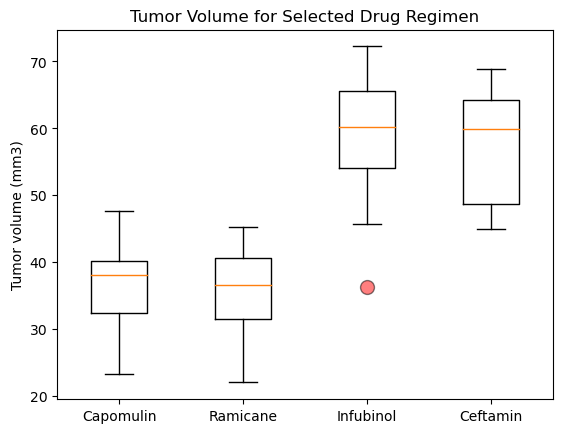

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create Plot Values.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Selected Drug Regimen')
ax1.set_ylabel('Tumor volume (mm3)')

# Create Plot and assigning colors for improved readability.
ax1.boxplot(tumor_data, labels=drug_regimen, 
            flierprops=dict(markerfacecolor='red', markersize=10, alpha=.5))

# Saving plot for ease of access.
plt.savefig('..\\Pymaceuticals\\fig5_boxplot_Tumor_Volume_Selected_Treatments.png')

# Showing plot.
plt.show()

## Line and Scatter Plots

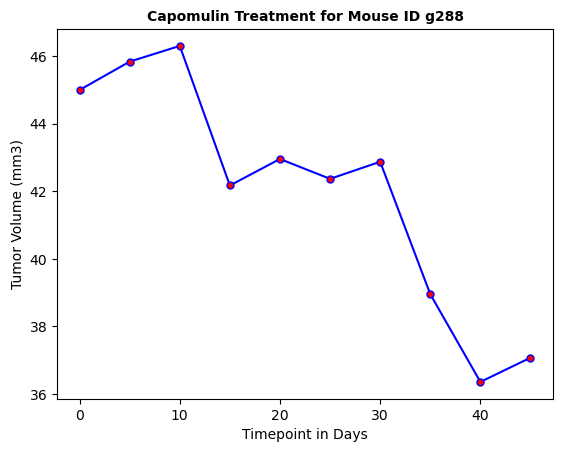

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_drug = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen']== 'Capomulin',:]

# Selecting a mouse from the capomulin drug trials.
mouse_id = capomulin_drug.loc[capomulin_drug["Mouse ID"] == 'g288',:]

# Print ID for Verification.
# print(mouse_id)

# Create Plot Values.
x = mouse_id['Timepoint']
tumor_for_mouse = mouse_id['Tumor Volume (mm3)']

# Create Plot and assigning colors for improved readability.
plt.plot(x,tumor_for_mouse, color='blue', markersize=5, 
         marker='o', markerfacecolor='red')

# Labeling and beautification of plot.
plt.title('Capomulin Treatment for Mouse ID g288', fontsize=10, fontweight='bold')
plt.xlabel('Timepoint in Days')
plt.ylabel('Tumor Volume (mm3)')

# Saving plot for ease of access.
plt.savefig('..\\Pymaceuticals\\fig6_lineplot_Tumor_Volume_Selected_MouseID_Capomulin_Treatment.png')

# Showing plot.
plt.show()

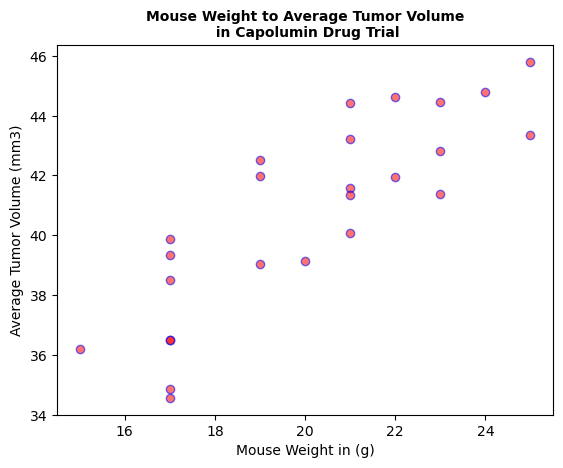

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Variable for grouping data and finding mean.
avrgd_capolumin_data = capomulin_drug.groupby(['Mouse ID']).mean()

# Setting up Scatter Plot and choosing appropriate colors and alpha to improve plot readability.
plt.scatter(avrgd_capolumin_data['Weight (g)'], 
            avrgd_capolumin_data['Tumor Volume (mm3)'], 
            color='red', marker='o', alpha=.55, edgecolors='blue')

# Labeling and beautification of plot.
plt.title('Mouse Weight to Average Tumor Volume\n in Capolumin Drug Trial', 
          fontsize=10, fontweight='bold')
plt.xlabel('Mouse Weight in (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Saving Plot for ease of access.
plt.savefig('..\\Pymaceuticals\\fig7_scatterplot_Capolumin_Drug_Trail_Weight_to_Average_Tumor_Size.png')

# Showing plot.
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient for mouse weight 
# and average observed tumor volume for the entire Capomulin regimen

# Variables for CC
x= avrgd_capolumin_data['Weight (g)']
y= avrgd_capolumin_data['Tumor Volume (mm3)']

# Calculating the Correlation Coefficient.
correlation_coefficient = round(st.pearsonr(x,y)[0],2)
print(f'The correlation coefficient between Mouse weight and Average Tumor Volume is {correlation_coefficient}.')

The correlation coefficient between Mouse weight and Average Tumor Volume is 0.84.


the r-squared value is 0.7088568047708723.


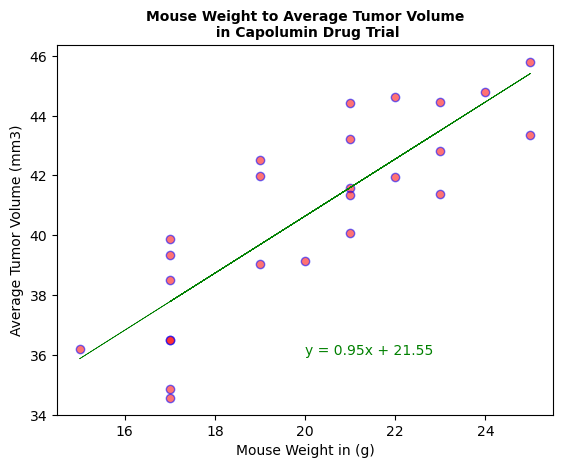

In [19]:
# Linear regression model for mouse weight 
# and average observed tumor volume for the entire Capomulin regimen

# Adding variables for values for linear regression.
x= avrgd_capolumin_data['Weight (g)']
y= avrgd_capolumin_data['Tumor Volume (mm3)']

# Establishing slope, intercept, rvalue, stderr for line.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept

# Creating the chart with linear regression line.
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x, y, color='red', marker='o', alpha=.55, edgecolors='blue')
plt.plot(x, regress_values, 'green', linewidth=.5)
plt.annotate(line_eq,(20,36), fontsize=10, color='green')

# Labeling and beautification of plot.
plt.title('Mouse Weight to Average Tumor Volume\n in Capolumin Drug Trial', 
          fontsize=10, fontweight='bold')
plt.xlabel('Mouse Weight in (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Saving chart for ease of access.
plt.savefig('..\\Pymaceuticals\\fig8_Scatterplot_with_linear_regression_for_Tumor_weight_in_Capolumin_Drug_trial.png')

# Showing the chart and printing r-squared value to determine strenght of correlation.
print(f'the r-squared value is {rvalue**2}.')
plt.show()